In [4]:
import pandas as pd
file = r"data_set/3-3 600519.csv"
df_gzmt = pd.read_csv(file, encoding='utf-8')
df_gzmt.shape

(4094, 8)

In [4]:
# 通过info方法，快速查看具体的字段以及主要字段的类型、存在空值情况、数组表单消耗内存的情况等
df_gzmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4094 entries, 0 to 4093
Data columns (total 8 columns):
day           4094 non-null object
STOCK_CODE    4094 non-null int64
open          4094 non-null float64
close         4094 non-null float64
maximum       4094 non-null float64
minimum       4094 non-null float64
volume        4094 non-null int64
TURNOVER      4094 non-null int64
dtypes: float64(4), int64(3), object(1)
memory usage: 256.0+ KB


In [5]:
# 利用unique函数，查看字段值的唯一性指标
df_gzmt['STOCK_CODE'].unique()

array([6005191], dtype=int64)

In [6]:
# 通过describe方法，快速查看多字段的统计信息，包含最大最小、均值、标准差等信息
df_gzmt.describe()

,STOCK_CODE,open,close,maximum,minimum,volume,TURNOVER
count,4094.0,4094.000000,4094.000000,4094.000000,4094.000000,4094.000000,4.094000e+03
mean,6005191.0,182.161910,182.435230,184.879680,179.801353,27092.525892,6.487986e+08
std,0.0,165.857882,165.994905,168.082099,163.752065,24623.472099,9.550262e+08
min,6005191.0,20.900000,20.880000,21.000000,20.710000,238.000000,1.421413e+06
25%,6005191.0,47.405000,47.482500,48.222500,46.705000,10186.750000,6.203505e+07
50%,6005191.0,159.930000,159.980000,161.910000,157.875000,22491.000000,3.727192e+08
75%,6005191.0,208.500000,209.457500,212.175000,205.945000,36759.500000,7.486596e+08
max,6005191.0,800.000000,799.190000,803.500000,788.880000,406318.000000,1.066339e+10


In [7]:
# 提取STOCK_CODE的最后一位，1表示在上交所上市
df_gzmt['place'] = df_gzmt['STOCK_CODE'] % 10
df_gzmt['code'] = df_gzmt['STOCK_CODE'] // 10
df_gzmt

,day,STOCK_CODE,open,close,maximum,minimum,volume,TURNOVER,place,code
0,2001-08-27,6005191,34.51,35.55,37.78,32.85,406318,1410347008,1,600519
1,2001-08-28,6005191,34.99,36.86,37.00,34.61,129647,463463008,1,600519
2,2001-08-29,6005191,36.98,36.38,37.00,36.10,53252,194689000,1,600519
3,2001-08-30,6005191,36.28,37.10,37.51,36.00,48013,177558000,1,600519
4,2001-08-31,6005191,37.15,37.01,37.62,36.80,23231,86231000,1,600519
...,...,...,...,...,...,...,...,...,...,...
4089,2018-10-29,6005191,549.09,549.09,549.09,549.09,49076,2694714080,1,600519
4090,2018-10-30,6005191,510.00,524.00,543.00,509.02,204397,10663392512,1,600519
4091,2018-10-31,6005191,527.00,548.90,555.00,522.00,96885,5239853056,1,600519
4092,2018-11-01,6005191,555.00,563.00,585.50,551.25,98107,5581027328,1,600519


In [8]:
# 计算涨幅，并赋值给新增列m_increase
df_gzmt['m_increase'] = df_gzmt['close'] - df_gzmt['open']
# 计算平均成交价，并赋值给price_mean
df_gzmt['price_mean'] = df_gzmt['TURNOVER'] / df_gzmt['volume']
df_gzmt

,day,STOCK_CODE,open,close,maximum,minimum,volume,TURNOVER,place,code,m_increase,price_mean
0,2001-08-27,6005191,34.51,35.55,37.78,32.85,406318,1410347008,1,600519,1.04,3471.042405
1,2001-08-28,6005191,34.99,36.86,37.00,34.61,129647,463463008,1,600519,1.87,3574.807038
2,2001-08-29,6005191,36.98,36.38,37.00,36.10,53252,194689000,1,600519,-0.60,3655.994141
3,2001-08-30,6005191,36.28,37.10,37.51,36.00,48013,177558000,1,600519,0.82,3698.123425
4,2001-08-31,6005191,37.15,37.01,37.62,36.80,23231,86231000,1,600519,-0.14,3711.893590
...,...,...,...,...,...,...,...,...,...,...,...,...
4089,2018-10-29,6005191,549.09,549.09,549.09,549.09,49076,2694714080,1,600519,0.00,54908.999918
4090,2018-10-30,6005191,510.00,524.00,543.00,509.02,204397,10663392512,1,600519,14.00,52170.005000
4091,2018-10-31,6005191,527.00,548.90,555.00,522.00,96885,5239853056,1,600519,21.90,54083.222955
4092,2018-11-01,6005191,555.00,563.00,585.50,551.25,98107,5581027328,1,600519,8.00,56887.146972


In [9]:
# 查看收盘价不高于500的数据
df_gzmt['close'] <= 500

0        True
1        True
2        True
3        True
4        True
        ...  
4089    False
4090    False
4091    False
4092    False
4093    False
Name: close, Length: 4094, dtype: bool

In [10]:
# 逻辑运算常用的场景是按照某一条件进行筛选
df_gzmt[df_gzmt['close'] >= 780]

,day,STOCK_CODE,open,close,maximum,minimum,volume,TURNOVER,place,code,m_increase,price_mean
3896,2018-01-09,6005191,752.21,782.52,783.00,752.21,64592,5001164544,1,600519,30.31,77426.996284
3897,2018-01-10,6005191,785.00,785.71,788.88,773.48,47714,3731993152,1,600519,0.71,78215.893700
3899,2018-01-12,6005191,773.77,788.42,788.80,767.02,45988,3577281776,1,600519,14.65,77787.287466
3900,2018-01-15,6005191,793.46,785.37,799.06,779.02,52473,4136645488,1,600519,-8.09,78833.790483
3991,2018-06-04,6005191,752.35,781.97,782.90,745.88,73806,5697540352,1,600519,29.62,77196.167683
3992,2018-06-05,6005191,786.50,788.05,794.70,777.23,52630,4136578576,1,600519,1.55,78597.350865
3993,2018-06-06,6005191,788.00,785.75,800.95,782.30,48969,3870616720,1,600519,-2.25,79042.184239
3994,2018-06-07,6005191,789.98,780.97,795.55,778.90,39168,3078137472,1,600519,-9.01,78588.068627
3997,2018-06-12,6005191,778.00,799.19,803.50,776.50,55287,4385043200,1,600519,21.19,79314.182358
3998,2018-06-13,6005191,800.00,790.33,802.62,788.88,35244,2803441680,1,600519,-9.67,79543.799796


In [11]:
# 通过对多个布尔类型先进行逻辑运算（或运算|、与运算&、非运算~）
df_gzmt[(df_gzmt['close'] >= 750) & (df_gzmt['close'] <= 760)]

,day,STOCK_CODE,open,close,maximum,minimum,volume,TURNOVER,place,code,m_increase,price_mean
3895,2018-01-08,6005191,735.02,752.13,756.50,735.02,52205,3899951728,1,600519,17.11,74704.563318
3903,2018-01-18,6005191,747.93,750.74,765.00,744.09,58979,4443031296,1,600519,2.81,75332.428424
3904,2018-01-19,6005191,752.90,750.18,758.90,739.02,50926,3818021984,1,600519,-2.72,74971.958999
3913,2018-02-01,6005191,767.00,757.73,767.30,752.92,50583,3846421616,1,600519,-9.27,76041.785106
3940,2018-03-19,6005191,743.97,753.48,753.99,739.00,38667,2897348544,1,600519,9.51,74930.781907
3989,2018-05-31,6005191,730.25,751.13,751.62,730.24,71853,5356222464,1,600519,20.88,74544.173020
4003,2018-06-21,6005191,765.22,759.32,778.89,758.77,39183,3013867648,1,600519,-5.90,76917.735957
4006,2018-06-26,6005191,765.31,754.80,769.88,747.00,46578,3516945440,1,600519,-10.51,75506.579072
4020,2018-07-16,6005191,752.30,754.68,764.11,751.03,32475,2454501600,1,600519,2.38,75581.265589


In [12]:
# 如果是不连续条件呢？isin可以方便地解决这个问题
df_gzmt[df_gzmt['day'].isin([
    '2012-10-08',
    '2013-10-08',
    '2014-10-08',
    '2015-10-08',
    '2016-10-08',
    '2017-10-08',
    '2018-10-08',
])]

,day,STOCK_CODE,open,close,maximum,minimum,volume,TURNOVER,place,code,m_increase,price_mean
2616,2012-10-08,6005191,245.30,239.94,245.30,237.48,23608,566527568,1,600519,-5.36,23997.270756
2853,2013-10-08,6005191,135.76,136.67,137.40,134.19,56867,773294160,1,600519,0.91,13598.293562
3098,2014-10-08,6005191,161.00,160.73,161.10,157.80,45653,725030224,1,600519,-0.27,15881.327054
3342,2015-10-08,6005191,198.78,197.52,201.58,197.00,34392,684138048,1,600519,-1.26,19892.360084
4074,2018-10-08,6005191,715.41,686.15,719.00,686.15,82745,5798721536,1,600519,-29.26,70079.419131


In [13]:
# axis=0表示进行纵向方向的计算，axis=1表示进行横向方向的计算
df_gzmt['close'].mean(axis=0, skipna=True)

182.435229604299

In [14]:
# 求能够获取到的最小值和最大值的索引值
df_gzmt['close'].idxmax(axis=0)
df_gzmt['open'].idxmin(axis=0)

489

In [15]:
df_mt = pd.read_csv(file, encoding='utf-8', index_col=0)
df_mt
df_mt.index
df_mt.index.name
df_mt.columns

Index(['STOCK_CODE', 'open', 'close', 'maximum', 'minimum', 'volume',
       'TURNOVER'],
      dtype='object')

In [16]:
# 通过索引名字进行遍历,这里仅做演示，程序里增加了break，只打印第一轮循环
for day in df_mt.index:
    row = df_mt.loc[day]
    print(row)
    print('type is', type(row))
    print("{0} GZMT close price is {1} yuan".format(day, row['close']))
    break

STOCK_CODE    6.005191e+06
open          3.451000e+01
close         3.555000e+01
maximum       3.778000e+01
minimum       3.285000e+01
volume        4.063180e+05
TURNOVER      1.410347e+09
Name: 2001-08-27, dtype: float64
type is <class 'pandas.core.series.Series'>
2001-08-27 GZMT close price is 35.55 yuan


In [17]:
# 列循环和行循环的规律非常相似，无非就是循环对象变更为列名
for col in df_mt.columns:
    print(df_mt[col])
    print(df_mt.loc[:, col])
    print('type is', type(df_mt[col]))
    break

day
2001-08-27    6005191
2001-08-28    6005191
2001-08-29    6005191
2001-08-30    6005191
2001-08-31    6005191
               ...   
2018-10-29    6005191
2018-10-30    6005191
2018-10-31    6005191
2018-11-01    6005191
2018-11-02    6005191
Name: STOCK_CODE, Length: 4094, dtype: int64
day
2001-08-27    6005191
2001-08-28    6005191
2001-08-29    6005191
2001-08-30    6005191
2001-08-31    6005191
               ...   
2018-10-29    6005191
2018-10-30    6005191
2018-10-31    6005191
2018-11-01    6005191
2018-11-02    6005191
Name: STOCK_CODE, Length: 4094, dtype: int64
type is <class 'pandas.core.series.Series'>


In [18]:
# 内置的itertuples()和iterrows()等方法 ，是类似于迭代器的yield用法，一次产生一行的生成器
for index, row in df_mt.iterrows():
    print(index)
    print(row)
    print(type(row))
    break

2001-08-27
STOCK_CODE    6.005191e+06
open          3.451000e+01
close         3.555000e+01
maximum       3.778000e+01
minimum       3.285000e+01
volume        4.063180e+05
TURNOVER      1.410347e+09
Name: 2001-08-27, dtype: float64
<class 'pandas.core.series.Series'>


In [19]:
# 和iterrows()类似，itertuples()也是一种行循环方法，把每一行数据返回成 一个namedtuple，并且行的索引值作为元组的第一个元素。
for sub_tuple in df_mt.itertuples():
    print(sub_tuple, type(sub_tuple))
    print(sub_tuple.Index)
    print(sub_tuple.open)
    print(getattr(sub_tuple, 'close'))
    print(sub_tuple[-1])
    print(sub_tuple[-2:-1])
    break

Pandas(Index='2001-08-27', STOCK_CODE=6005191, open=34.51, close=35.55, maximum=37.78, minimum=32.85, volume=406318, TURNOVER=1410347008) <class 'pandas.core.frame.Pandas'>
2001-08-27
34.51
35.55
1410347008
(406318,)


In [35]:
# iteritems()是一种列循环的方法，返回列名和列的内容
for col_name, column in df_mt.iteritems():
    print(col_name)
    print(column)
    print(type(column))
    break

STOCK_CODE
day
2001-08-27    6005191
2001-08-28    6005191
2001-08-29    6005191
2001-08-30    6005191
2001-08-31    6005191
               ...   
2018-10-29    6005191
2018-10-30    6005191
2018-10-31    6005191
2018-11-01    6005191
2018-11-02    6005191
Name: STOCK_CODE, Length: 4094, dtype: int64
<class 'pandas.core.series.Series'>
open
day
2001-08-27     34.51
2001-08-28     34.99
2001-08-29     36.98
2001-08-30     36.28
2001-08-31     37.15
               ...  
2018-10-29    549.09
2018-10-30    510.00
2018-10-31    527.00
2018-11-01    555.00
2018-11-02    585.00
Name: open, Length: 4094, dtype: float64
<class 'pandas.core.series.Series'>
close
day
2001-08-27     35.55
2001-08-28     36.86
2001-08-29     36.38
2001-08-30     37.10
2001-08-31     37.01
               ...  
2018-10-29    549.09
2018-10-30    524.00
2018-10-31    548.90
2018-11-01    563.00
2018-11-02    599.90
Name: close, Length: 4094, dtype: float64
<class 'pandas.core.series.Series'>
maximum
day
2001-08-27    

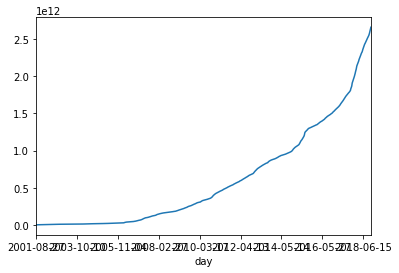

In [21]:
# 手动实现累计和的运算
%matplotlib inline
import matplotlib as plt
# 第一步：逐行计算累积值
df = pd.read_csv(file, encoding='utf-8', index_col=0)
cum_sum = []
last_cum = 0
for index, row in df.iterrows():
    tmp = row['TURNOVER'] + last_cum
    cum_sum.append(tmp)
    last_cum = tmp
# 新增一列，并用上一步的结果赋值
df['Turnover_CUMSUM'] = cum_sum
# 第三步：可视化效果
df['Turnover_CUMSUM'].plot()